<a href="https://colab.research.google.com/github/parvez050/50_Startup_Profit_Prediction-Using-Regression/blob/main/50_Startup_Profit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

### <u> Tasks </u>
* ### Validate all the assumptions
* ### Compute all the regression evaluation metrics
* ### Comment on the best evaluation metrics for this problem

In [4]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

In [5]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 4/Lecture 4.3/50_Startups.csv')

In [7]:
len(dataset)

50

In [8]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Data Cleaning

In [9]:
dataset.shape

(50, 5)

There are 50 columns and 5 rows in dataset

In [10]:
# statistical information of dataset
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [12]:
# checking dublicate values
dataset.duplicated().sum()

0

There are no duplicate values in the dataset

In [13]:
# checking null values in the dataset
dataset.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

There are no null values in the dataset

## EDA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


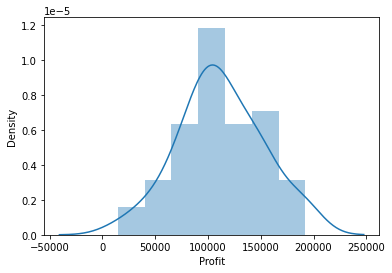

In [14]:
sns.distplot(dataset['Profit'])

The average profit (which is 1,00,000) is the most frequent i.e. this should be in the category of distribution plot.

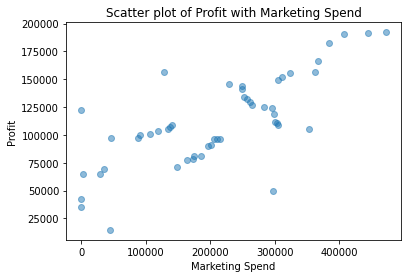

In [15]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

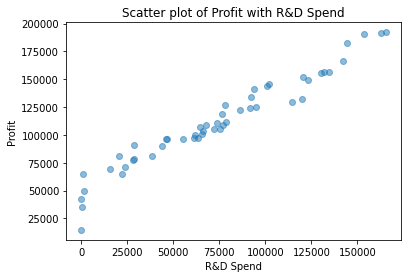

In [16]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

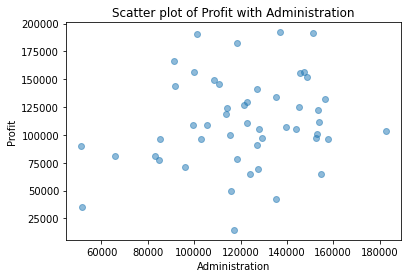

In [17]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

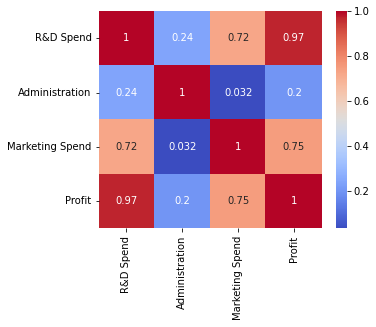

In [18]:
plt.figure(figsize = (5,4))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot = True, cmap = 'coolwarm')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


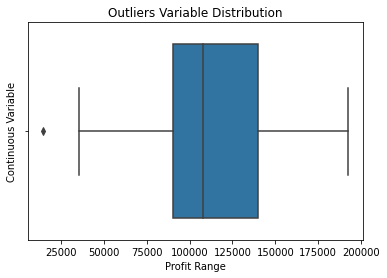

In [19]:
sns.boxplot(dataset['Profit'])
plt.title("Outliers Variable Distribution")
plt.ylabel("Continuous Variable")
plt.xlabel("Profit Range")
plt.show()

While looking at the boxplot we can see the outliers in the profit(target variable), but the amount of data is not much (just 50 entries) so it won’t create much negative impact.

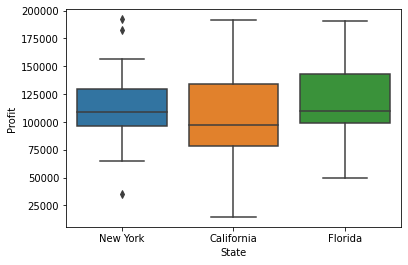

In [20]:
sns.boxplot(x = 'State', y = 'Profit', data = dataset)
plt.show()

All outliers presented are in New York.The startups located in California we can see the maximum profits and maximum loss.

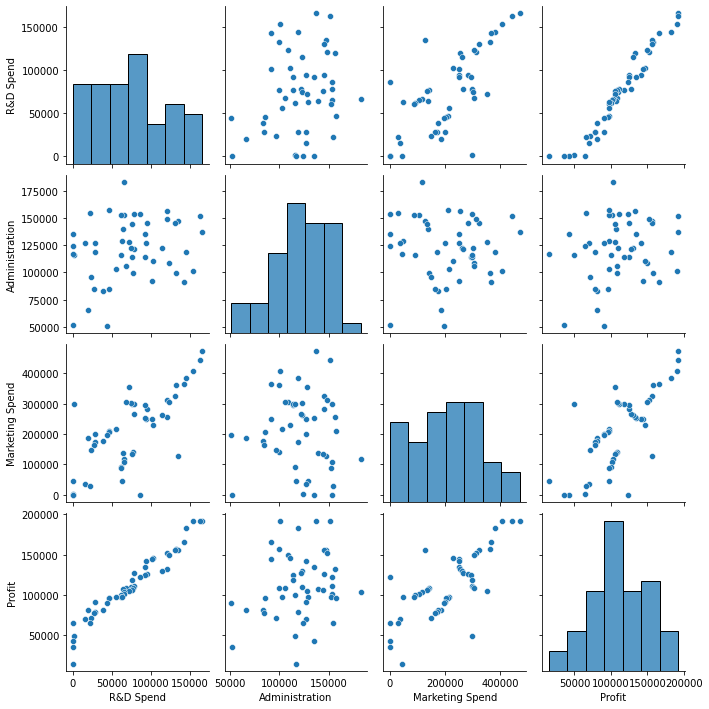

In [21]:
sns.pairplot(dataset)
plt.show()

As we can see in the pair pot, Research and development are directly proportional to the investment that we can do.
The marketing spend seems to be directly proportional (though a little bit outliers are there) with the profit.
There is no relationship between the second column and profit i.e. our target column.

## Model Development

Text(0, 0.5, 'Profit')

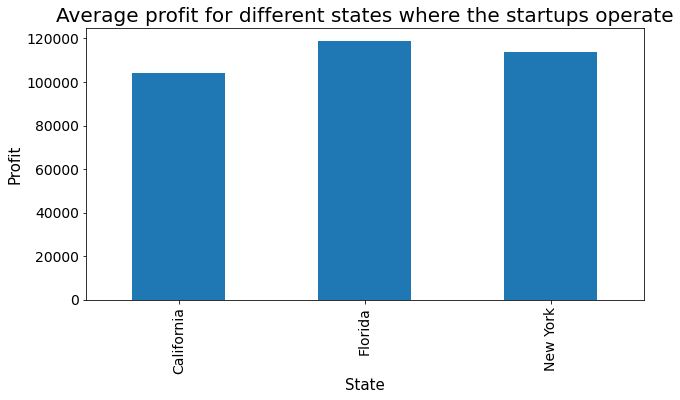

In [22]:
# Create the figure object 
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# Set the title
ax.set_title("Average profit for different states where the startups operate", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)

In [23]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [24]:
# Create dummy variables for the catgeorical variable State
dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)

# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [25]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [26]:
dependent_variable = 'Profit'

In [27]:
# Create a list of independent variables
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [28]:
independent_variables

['R&D Spend',
 'California_State',
 'Florida_State',
 'Administration',
 'Marketing Spend',
 'NewYork_State']

In [29]:
# Create the data of independent variables
X = dataset[independent_variables].values

# Create the dependent variable data
y = dataset[dependent_variable].values

In [30]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train[0:10]

array([[0.33561668, 0.        , 1.        , 0.48655174, 0.45494286,
        0.        ],
       [0.2782839 , 0.        , 0.        , 0.3173015 , 0.43561799,
        1.        ],
       [0.45557444, 0.        , 1.        , 0.87258866, 0.28413435,
        0.        ],
       [0.2807759 , 1.        , 0.        , 1.        , 0.44680961,
        0.        ],
       [0.55488118, 0.        , 1.        , 0.59103645, 0.62511553,
        0.        ],
       [0.7880179 , 0.        , 1.        , 0.88568959, 0.68649342,
        0.        ],
       [0.72539353, 0.        , 1.        , 0.98922572, 0.54370828,
        0.        ],
       [0.0060492 , 0.        , 0.        , 0.6847981 , 0.0040356 ,
        1.        ],
       [0.00327821, 0.        , 0.        , 0.00432296, 0.        ,
        1.        ],
       [0.39676926, 0.        , 0.        , 0.95618996, 0.22709197,
        1.        ]])

In [33]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
# the model intercept
regressor.intercept_

44153.95466784855

In [35]:
# model coefficients
regressor.coef_

array([ 1.27892182e+05,  8.66383692e+01, -8.72645791e+02,  3.49927567e+03,
        1.72720281e+04,  7.86007422e+02])

In [36]:
# Predicting the Test set results
y_train_pred = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

## Model Evaluation

In [37]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squarred Error is :" ,mse)

Mean Squarred Error is : 83502864.03257704


In [38]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(" Root Mean Squarred Error is :",rmse*100)

 Root Mean Squarred Error is : 913799.0152794926


In [39]:
r2score = r2_score(y_test, y_pred)
print("R2 Score is :", r2score)

R2 Score is : 0.9347068473282427


In [40]:
mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error is :" ,mae)

Mean Absolute Error is : 7514.293659640595


# Conclusion

So with this we are finally done with our project 50 Startups profit prediction .The R2 score we can see above is almost close to 1 that is 0.93 and
So, the mean absolute error is 7514.293659640597. Therefore our predicted value can be 7514.293659640597 units more or less than the actual value.